<a href="https://colab.research.google.com/github/fefiretti/cases/blob/main/Exporta%C3%A7%C3%A3o_e_Importa%C3%A7%C3%A3o_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# <font color = #08306F>1. Introdução

---



O Comércio exterior é uma importante fonte de giro de economia de um país, no ano de 2023, o Brasil bateu o seu recorde de exportações em um ano, atingindo a marca de US$ 339,67 bilhões, isso contribuiu para um crescimento de 2,9% do PIB no período.

Faço uma análise sobre esses números e alguns fatores relevantes, utilizando os dados disponibilizados em: https://www.gov.br/mdic/pt-br/assuntos/comercio-exterior/estatisticas/base-de-dados-bruta

# <font color = #08306F>2. Importação de arquivos e tabelas auxiliares

In [ ]:
## Criação de tabela auxiliar de mês

aux_mes = {
    1: 'Jan',
    2: 'Fev',
    3: 'Mar',
    4: 'Abr',
    5: 'Mai',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Set',
    10: 'Out',
    11: 'Nov',
    12: 'Dez'}
aux_mes


{1: 'Jan',
 2: 'Fev',
 3: 'Mar',
 4: 'Abr',
 5: 'Mai',
 6: 'Jun',
 7: 'Jul',
 8: 'Ago',
 9: 'Set',
 10: 'Out',
 11: 'Nov',
 12: 'Dez'}

In [ ]:
## Dicionário auxiliar de meios de transporte na importação.

aux = '/content/drive/MyDrive/TABELAS_AUXILIARES.xlsx'
aux_transporte = pd.read_excel(aux,"14")
aux_transporte = dict(zip(aux_transporte['CO_VIA'],aux_transporte['NO_VIA']))
aux_transporte

{99: 'VIA DESCONHECIDA',
 13: 'POR REBOQUE',
 11: 'COURIER',
 15: 'VICINAL FRONTEIRICO',
 14: 'DUTOS',
 12: 'EM MAOS',
 0: 'VIA NAO DECLARADA',
 1: 'MARITIMA',
 2: 'FLUVIAL',
 3: 'LACUSTRE',
 4: 'AEREA',
 5: 'POSTAL',
 6: 'FERROVIARIA',
 7: 'RODOVIARIA',
 8: 'CONDUTO/REDE DE TRANSMISSAO',
 9: 'MEIOS PROPRIOS',
 10: 'ENTRADA/SAIDA FICTA'}

In [ ]:
## Dicionário auxiliar para países

pais = pd.read_excel(aux,"10")
pais = dict(zip(pais['CO_PAIS'],pais['NO_PAIS']))
pais

{0: 'Não Definido',
 13: 'Afeganistão',
 15: 'Aland, Ilhas',
 17: 'Albânia',
 20: 'Alboran-Perejil, Ilhas',
 23: 'Alemanha',
 25: 'Alemanha Oriental',
 31: 'Burkina Faso',
 37: 'Andorra',
 40: 'Angola',
 41: 'Anguilla',
 42: 'Antártica',
 43: 'Antígua e Barbuda',
 47: 'Antilhas Holandesas',
 53: 'Arábia Saudita',
 59: 'Argélia',
 63: 'Argentina',
 64: 'Armênia',
 65: 'Aruba',
 69: 'Austrália',
 72: 'Áustria',
 73: 'Azerbaijão',
 77: 'Bahamas',
 80: 'Barein',
 81: 'Bangladesh',
 83: 'Barbados',
 85: 'Belarus',
 87: 'Bélgica',
 88: 'Belize',
 90: 'Bermudas',
 93: 'Mianmar',
 97: 'Bolívia',
 98: 'Bósnia-Herzegovina',
 99: 'Bonaire, Saint Eustatius e Saba',
 100: 'Internação na Zona Franca de Manaus',
 101: 'Botsuana',
 102: 'Bouvet, Ilha',
 105: 'Brasil',
 108: 'Brunei',
 111: 'Bulgária',
 115: 'Burundi',
 119: 'Butão',
 127: 'Cabo Verde',
 137: 'Cayman, Ilhas',
 141: 'Camboja',
 145: 'Camarões',
 149: 'Canadá',
 150: 'Canal, Ilhas do (Guernsey)',
 151: 'Canárias, Ilhas',
 152: 'Canal, Il

In [ ]:
## Dicionário auxiliar para números de NCM.

ncm = pd.read_excel(aux,"1")
ncm = dict(zip(ncm['CO_NCM'],ncm['NO_NCM_POR']))
ncm

{1011010: 'Cavalos reprodutores de raça pura',
 1011090: 'Animais da espécie asinina/muar, reprodutores, raça pura',
 1011100: 'Cavalos reprodutores, de raça pura',
 1011900: 'Outros cavalos, vivos',
 1012000: 'Asininos e muares vivos',
 1012100: 'Cavalos reprodutores de raça pura',
 1012900: 'Cavalos, exceto reprodutores de raça pura',
 1013000: 'Animais espécie asinina/muar, reprodutores de raça pura',
 1019000: 'Animais espécie asinina/muar, exceto reprodutores de raça pura',
 1019010: 'Cavalos vivos, exceto reprodutores raça pura',
 1019090: 'Animais espécie asinina/muar, exceto reprodutores de raça pura pura',
 1021010: 'Bovinos reprodutores de raça pura, prenhe ou cria ao pé',
 1021090: 'Outros bovinos reprodutores de raça pura',
 1022110: 'Bovinos reprodutores raça pura, prenhe ou com cria ao pé',
 1022190: 'Outros bovinos reprodutores de raça pura',
 1022911: 'Outros bovinos para reprodução, prenhe ou com cria ao pé',
 1022919: 'Outros bovinos para reprodução',
 1022990: 'Outro

In [ ]:
## Trazendo arquivos com os dados de exportação e importação

arquivo_ex = '/content/drive/MyDrive/EXP_2023.csv'
arquivo_imp = '/content/drive/MyDrive/IMP_2023.csv'

# <font color = #08306F>3. Dados de Exportação

---




##3.1 Importando e tratando os dados do arquivo de exportações

In [ ]:
dados_exp = pd.read_csv(arquivo_ex,sep = ";")
dados_exp.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,2023,3,84139190,10,160,RJ,4,817700,107365,5,20
1,2023,12,73182100,10,764,SP,1,817800,0,0,84
2,2023,4,84219999,10,40,RS,4,817600,2,2,758
3,2023,5,85291090,10,63,RJ,7,1017503,1,1,275
4,2023,10,84825010,11,63,MG,7,1017503,2,0,9


In [ ]:
## Verificando a consistência dos dados

dados_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563659 entries, 0 to 1563658
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   CO_ANO      1563659 non-null  int64 
 1   CO_MES      1563659 non-null  int64 
 2   CO_NCM      1563659 non-null  int64 
 3   CO_UNID     1563659 non-null  int64 
 4   CO_PAIS     1563659 non-null  int64 
 5   SG_UF_NCM   1563659 non-null  object
 6   CO_VIA      1563659 non-null  int64 
 7   CO_URF      1563659 non-null  int64 
 8   QT_ESTAT    1563659 non-null  int64 
 9   KG_LIQUIDO  1563659 non-null  int64 
 10  VL_FOB      1563659 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 131.2+ MB


Não há necessidade de tratamento de dados nulos

In [ ]:
## Removendo colunas de ano e URF, que não serão utilizadas nessas análise

dados_exp.drop(columns={'CO_ANO','CO_URF'}, axis = 1, inplace = True)
dados_exp

,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,3,84139190,10,160,RJ,4,107365,5,20
1,12,73182100,10,764,SP,1,0,0,84
2,4,84219999,10,40,RS,4,2,2,758
3,5,85291090,10,63,RJ,7,1,1,275
4,10,84825010,11,63,MG,7,2,0,9
...,...,...,...,...,...,...,...,...,...
1563654,11,64029990,13,337,RS,1,4284,2549,38719
1563655,11,85321000,11,670,RS,4,24,13,226
1563656,2,20091900,10,586,PR,7,17175,17175,12457
1563657,12,9101100,10,160,MA,1,10,10,30


In [ ]:
## Substituindo o nome do país e o tipo de transporte no dataframe.

dados_exp['CO_PAIS'] = dados_exp['CO_PAIS'].replace(pais)
dados_exp['CO_VIA'] = dados_exp['CO_VIA'].replace(aux_transporte)
dados_exp.head()

,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,QT_ESTAT,KG_LIQUIDO,VL_FOB
0,3,84139190,10,China,RJ,AEREA,107365,5,20
1,12,73182100,10,Suécia,SP,MARITIMA,0,0,84
2,4,84219999,10,Angola,RS,AEREA,2,2,758
3,5,85291090,10,Argentina,RJ,RODOVIARIA,1,1,275
4,10,84825010,11,Argentina,MG,RODOVIARIA,2,0,9


##3.2 Análise exploratória dos dados

In [ ]:
## Contagens de exportação

transacoes_exp = len(dados_exp)
num_ncm_exp = dados_exp['CO_NCM'].nunique()
num_paises_exp = dados_exp['CO_PAIS'].nunique()
fob_medio_exp = dados_exp['VL_FOB'].mean().round(2)
total_exp = (dados_exp['VL_FOB'].sum() / 10**9).round(2)

print('Em 2023, foram realizadas ',
      transacoes_exp,
      ' transações, com ',
      num_ncm_exp,
      ' NCMs negocicados com ',
      num_paises_exp,
      ' países.\nO valor médio das faturas foi de US$ ',
      fob_medio_exp,
      ', com isso, o total faturado em exportações foi US$',
      total_exp,
      'bilhões.')

Em 2023, foram realizadas  1563659  transações, com  8014  NCMs negocicados com  243  países.
O valor médio das faturas foi de US$  217244.15 , com isso, o total faturado em exportações foi US$ 339.7 bilhões.


##3.3 Produtos mais exportados

In [ ]:
# Verificação dos produtos que tiveram maior faturamento

dados_produtos_exp = pd.DataFrame({'Valor Exp. (US$ Bi)': (((dados_exp.groupby('CO_NCM')['VL_FOB'].sum() )/ 10**9).round(2)),
                               "Transações": dados_exp['CO_NCM'].value_counts()})
dados_produtos_exp.rename(index = ncm, inplace = True)
dados_produtos_exp.dropna(axis = 0, inplace = True)
dados_produtos_exp['%'] = ((dados_produtos_exp['Valor Exp. (US$ Bi)'] / total_exp) * 100).round(2)
dados_produtos_exp['Transações'] = dados_produtos_exp['Transações'].astype(int)
dados_produtos_exp.sort_values(by ='Valor Exp. (US$ Bi)', ascending = False, inplace = True)
dados_produtos_exp.index.name = 'NCM'
dados_produtos_exp.head(15)

,Valor Exp. (US$ Bi),Transações,%
NCM,,,
"Soja, mesmo triturada, exceto para semeadura",53.24,2141,15.67
Óleos brutos de petróleo,42.61,346,12.54
"Minérios de ferro e seus concentrados, exceto as piritas de ferro ustuladas (cinzas de piritas), não aglomerados",27.30,482,8.04
"Milho em grão, exceto para semeadura",13.46,2559,3.96
Outros açúcares de cana,13.35,1613,3.93
"Bagaços e outros resíduos sólidos, da extração do óleo de soja",8.55,864,2.52
"Carnes desossadas de bovino, congeladas",8.50,6789,2.50
Fuel oil,7.56,1291,2.23
"Café não torrado, não descafeinado, em grão",7.31,3559,2.15


In [ ]:
top_n_valores = dados_produtos_exp.nlargest(5, 'Valor Exp. (US$ Bi)')
soma_percentual_top_5 = top_n_valores['%'].sum()
soma_percentual_top_5

44.14

Na análise dos números, o produto que mais trouxe receita foi a soja, seguido do petróleo, minério de ferro e açucar, indicando que o Brasil é um país que exporta itens que ainda serão processados ou manufaturados posteriormente.

Os 5 principais produtos representam **44,14%** do total faturado em 2023.

Isso demonstra que, qualquer variação na exploração desses materiais pode significar um impacto negativo no resultado da balança comercial.

##3.4 Países com maior faturamento

In [ ]:
dados_pais_exp = pd.DataFrame({'Valor Exp. (US$ Bi)': (((dados_exp.groupby('CO_PAIS')['VL_FOB'].sum() )/ 10**9).round(2)),
                               "Transações": dados_exp['CO_PAIS'].value_counts()},
                              index = pais.values())
dados_pais_exp.dropna(axis = 0, inplace = True)
dados_pais_exp['%'] = ((dados_pais_exp['Valor Exp. (US$ Bi)'] / total_exp) * 100).round(2)
dados_pais_exp['Transações'] = dados_pais_exp['Transações'].astype(int)
dados_pais_exp['Média US$ x 1000'] = ((dados_pais_exp['Valor Exp. (US$ Bi)'] * 10**6) / dados_pais_exp['Transações']).round(2)
dados_pais_exp.sort_values(by ='Valor Exp. (US$ Bi)', ascending = False, inplace = True)
dados_produtos_exp.index.name = 'País'
dados_pais_exp.head(15)

,Valor Exp. (US$ Bi),Transações,%,Média US$ x 1000
China,104.32,26728,30.71,3903.02
Estados Unidos,36.92,96546,10.87,382.41
Argentina,16.71,84437,4.92,197.90
Países Baixos (Holanda),12.15,15345,3.58,791.79
México,8.57,46598,2.52,183.91
Chile,7.94,63861,2.34,124.33
Espanha,7.86,12811,2.31,613.54
Singapura,7.46,34898,2.20,213.77
Japão,6.62,15306,1.95,432.51
Canadá,5.77,11557,1.70,499.26


<Axes: title={'center': 'Top 10 - Países compradores'}, xlabel='FOB US$ Bi', ylabel='Países'>

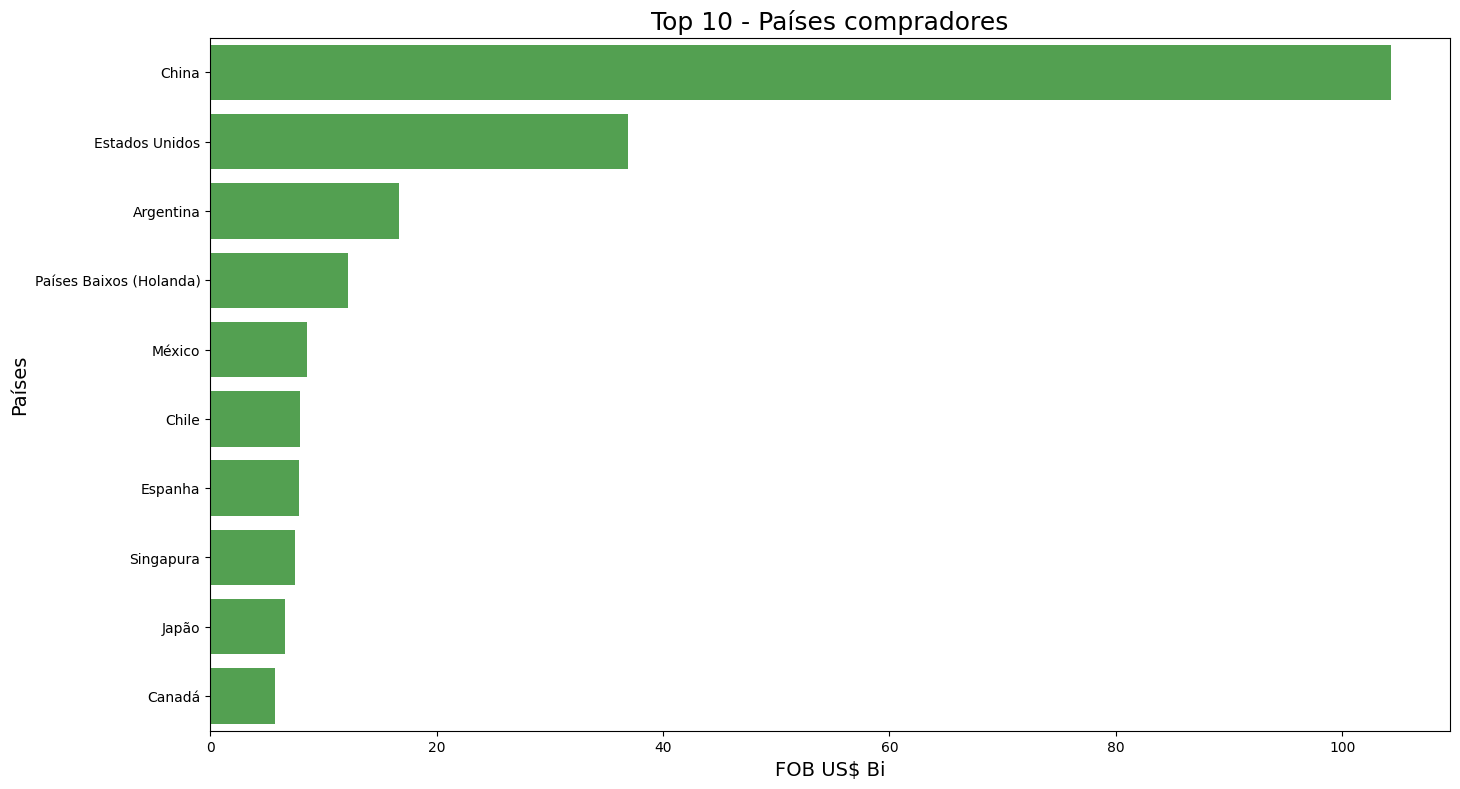

In [ ]:
ax = sns.barplot(data = dados_pais_exp.nlargest(10, 'Valor Exp. (US$ Bi)'),
                 x = 'Valor Exp. (US$ Bi)',
                 y = dados_pais_exp.nlargest(10, 'Valor Exp. (US$ Bi)').index,
                 orient = 'h',
                 color = '#46AD44')
ax.figure.set_size_inches(16,9)
ax.set_title('Top 10 - Países compradores', fontsize = 18)
ax.set_ylabel("Países", fontsize = 14)
ax.set_xlabel("FOB US$ Bi", fontsize = 14)
ax

China e Estados Unidos são os principais parceiros comerciais do Brasil, no quesito de exportações eles combinam para mais de 41% da receita gerada, tornando-se imprescindíveis para a saúde financeira do país.

Há 4x mais negociações para os Estados Unidos do que a China, apesar disso, o valor arrecadado em transações para o país asiático é quase 3 vezes maior. Isso indica que os produtos comercializados para a China são mais caros (US$ 3,90 Milhões x 382 Mil dólares) no valor do ticket médio.

# <font color = #08306F>4. Dados de Importação

---

##4.1 Importando e tradando os dados do arquivo de importações

In [ ]:
## Importando dados de arquivo de importação

dados_imp = pd.read_csv(arquivo_imp,sep = ";")
dados_imp.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,2023,2,84332010,11,232,SP,1,917800,2,1970,21899,1075,37
1,2023,12,62129000,11,160,SP,1,817800,33692,3295,29555,453,12
2,2023,1,55152200,10,160,ES,1,817800,796,796,3985,151,0
3,2023,8,84818099,11,160,GO,4,817600,162,63,6354,734,12
4,2023,12,30021235,10,245,SP,4,817600,2444,2444,1989352,11233,508


In [ ]:
## Alterando as colunas de país e via de transporte

dados_imp['CO_PAIS'] = dados_imp['CO_PAIS'].replace(pais)
dados_imp['CO_VIA'] = dados_imp['CO_VIA'].replace(aux_transporte)
dados_imp.head()

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,2023,2,84332010,11,Dinamarca,SP,MARITIMA,917800,2,1970,21899,1075,37
1,2023,12,62129000,11,China,SP,MARITIMA,817800,33692,3295,29555,453,12
2,2023,1,55152200,10,China,ES,MARITIMA,817800,796,796,3985,151,0
3,2023,8,84818099,11,China,GO,AEREA,817600,162,63,6354,734,12
4,2023,12,30021235,10,Espanha,SP,AEREA,817600,2444,2444,1989352,11233,508


In [ ]:
## Verificando a consistência dos dados

dados_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088669 entries, 0 to 2088668
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   CO_ANO      int64 
 1   CO_MES      int64 
 2   CO_NCM      int64 
 3   CO_UNID     int64 
 4   CO_PAIS     object
 5   SG_UF_NCM   object
 6   CO_VIA      object
 7   CO_URF      int64 
 8   QT_ESTAT    int64 
 9   KG_LIQUIDO  int64 
 10  VL_FOB      int64 
 11  VL_FRETE    int64 
 12  VL_SEGURO   int64 
dtypes: int64(10), object(3)
memory usage: 207.2+ MB


In [ ]:
## Removendo colunas de ano e URF, que não serão utilizadas nessas análise

dados_imp.drop(columns={'CO_ANO','CO_URF'}, axis = 1, inplace = True)
dados_imp

,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,2,84332010,11,Dinamarca,SP,MARITIMA,2,1970,21899,1075,37
1,12,62129000,11,China,SP,MARITIMA,33692,3295,29555,453,12
2,1,55152200,10,China,ES,MARITIMA,796,796,3985,151,0
3,8,84818099,11,China,GO,AEREA,162,63,6354,734,12
4,12,30021235,10,Espanha,SP,AEREA,2444,2444,1989352,11233,508
...,...,...,...,...,...,...,...,...,...,...,...
2088664,7,84714100,11,Taiwan (Formosa),MG,AEREA,2,3,912,86,3
2088665,6,32064990,10,Singapura,SP,AEREA,100,100,1123,1830,1
2088666,8,73209000,10,"Tcheca, República",SC,MARITIMA,1362,1362,4974,463,4
2088667,1,85411022,11,Filipinas,RS,AEREA,15,0,7,0,0


##4.2 Análise exploratória dos dados

In [ ]:
## Contagens de importação

transacoes_imp = len(dados_imp)
num_ncm_imp = dados_imp['CO_NCM'].nunique()
num_paises_imp = dados_imp['CO_PAIS'].nunique()
fob_medio_imp = dados_imp['VL_FOB'].mean().round(2)
total_imp = (dados_imp['VL_FOB'].sum() / 10**9).round(2)

print('Em 2023, foram realizadas ',
      transacoes_imp,
      ' transações, com ',
      num_ncm_imp,
      ' NCMs negocicados com ',
      num_paises_imp,
      ' países.\nO valor médio das faturas foi de US$ ',
      fob_medio_imp,
      ', com isso, o total faturado em importações foi US$',
      total_imp,
      'bilhões.')

Em 2023, foram realizadas  2088669  transações, com  8719  NCMs negocicados com  238  países.
O valor médio das faturas foi de US$  115285.3 , com isso, o total faturado em importações foi US$ 240.79 bilhões.


##4.3 Produtos mais importados

In [ ]:
# Verificação dos produtos mais importados

dados_produtos_imp = pd.DataFrame({'Valor Imp. (US$ Bi)': (((dados_imp.groupby('CO_NCM')['VL_FOB'].sum() )/ 10**9).round(2)),
                               "Transações": dados_imp['CO_NCM'].value_counts()})
dados_produtos_imp.rename(index = ncm, inplace = True)
dados_produtos_imp.dropna(axis = 0, inplace = True)
dados_produtos_imp['%'] = ((dados_produtos_imp['Valor Imp. (US$ Bi)'] / total_imp) * 100).round(2)
dados_produtos_imp['Transações'] = dados_produtos_imp['Transações'].astype(int)
dados_produtos_imp.sort_values(by ='Valor Imp. (US$ Bi)', ascending = False, inplace = True)
dados_produtos_imp.index.name = 'NCM'
dados_produtos_imp.head(15)

,Valor Imp. (US$ Bi),Transações,%
NCM,,,
Gasóleo (óleo diesel),9.69,289,4.02
Óleos brutos de petróleo,9.06,137,3.76
Outros cloretos de potássio,4.85,839,2.01
Células fotovoltaicas montadas em módulos ou em painéis,3.85,661,1.60
"Hulha betuminosa, não aglomerada",3.63,168,1.51
Partes de turborreatores ou de turbopropulsores,3.51,1307,1.46
Turborreatores de empuxo superior a 25 kN,2.85,82,1.18
"Diidrogeno-ortofosfato de amônio (fosfato monoamônico ou monoamoniacal), mesmo misturado com hidrogeno-ortofosfato de diamônio (fosfato diamônico ou diamoniacal)",2.76,567,1.15
Naftas para petroquimica,2.65,54,1.10


In [ ]:
top_n_valores = dados_produtos_imp.nlargest(10, 'Valor Imp. (US$ Bi)')
soma_percentual_top_10 = top_n_valores['%'].sum()
soma_percentual_top_10

18.88

Para as importações, analisando apenas os NCMs separadamente, notamos que não há um discrepância nos valores FOB dos produtos comercializados. Em primeiro lugar está o óleo Diesel, seguido do petróleo, materiais importantes para suprir necessidades energéticas, seja na matriz energética do país ou mesmo para o abastecimento de veículos.
Em seguida, há uma gama de produtos cujo o principal uso é a utilização em processos de transformação, também notamos alguns materiais que podem ser utilizados no setor agrícola.

## 4.4 Países por importações para o Brasil


In [ ]:
dados_pais_imp = pd.DataFrame({'Valor Imp. (US$ Bi)': (((dados_imp.groupby('CO_PAIS')['VL_FOB'].sum() )/ 10**9).round(2)),
                               "Transações": dados_imp['CO_PAIS'].value_counts(dropna=True)},
                              index = pais.values())
dados_pais_imp['%'] = ((dados_pais_imp['Valor Imp. (US$ Bi)'] / total_imp) * 100).round(2)
dados_pais_imp.dropna(axis = 0, inplace = True)
dados_pais_imp['Transações'] = dados_pais_imp['Transações'].astype(int)
dados_pais_imp.sort_values(by ='Valor Imp. (US$ Bi)', ascending = False, inplace = True)
dados_pais_imp.head(10)

,Valor Imp. (US$ Bi),Transações,%
China,53.18,423971,22.09
Estados Unidos,37.96,232295,15.76
Alemanha,13.15,170943,5.46
Argentina,12.00,27161,4.98
Rússia,10.01,2706,4.16
Índia,6.87,67301,2.85
Itália,5.85,125591,2.43
México,5.54,47296,2.30
França,5.50,76178,2.28
Japão,5.13,84111,2.13


<Axes: title={'center': 'Top 10 - Países exportadores'}, xlabel='FOB US$ Bi', ylabel='Países'>

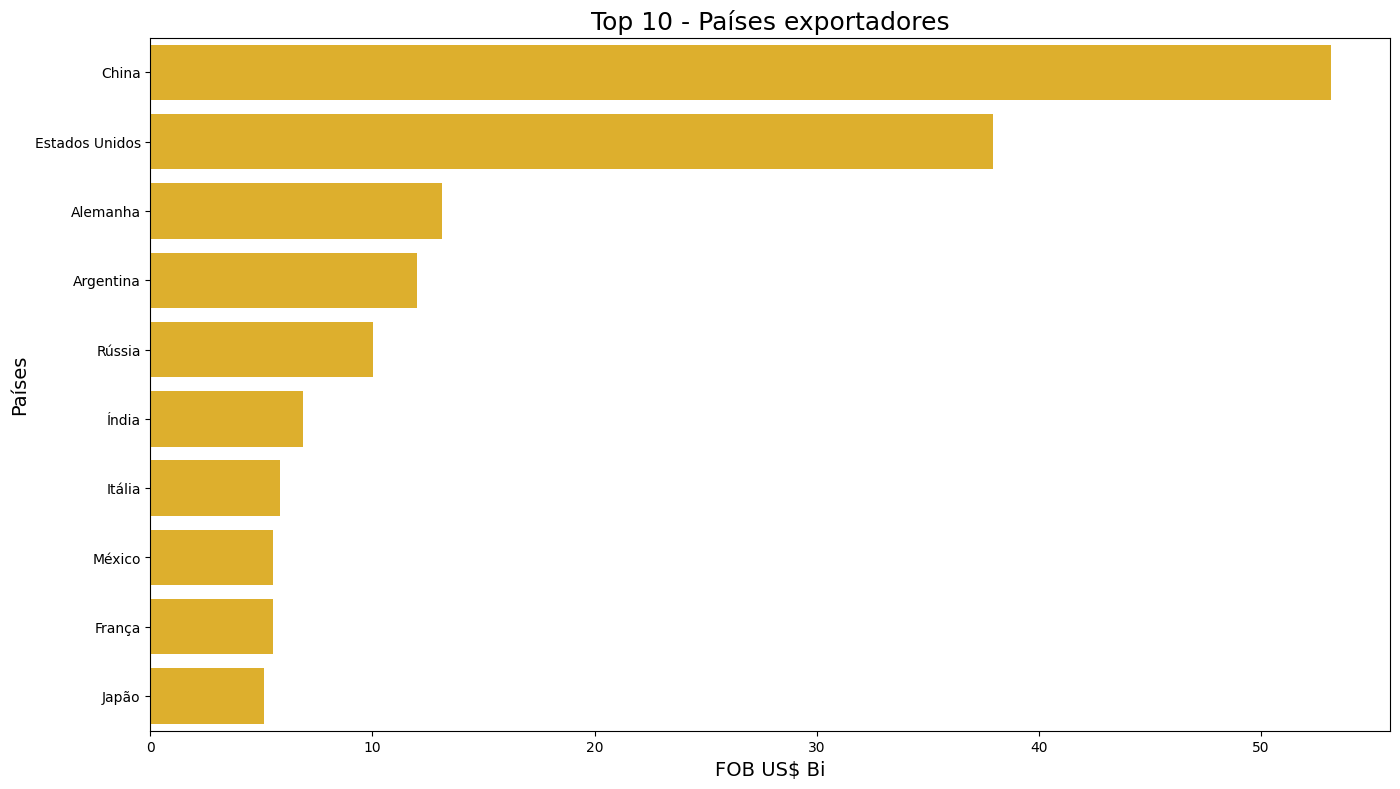

In [ ]:
ax = sns.barplot(data = dados_pais_imp.nlargest(10, 'Valor Imp. (US$ Bi)'),
                 x = 'Valor Imp. (US$ Bi)',
                 y = dados_pais_imp.nlargest(10, 'Valor Imp. (US$ Bi)').index,
                 orient = 'h',
                 color = '#FABD10')
ax.figure.set_size_inches(16,9)
ax.set_title('Top 10 - Países exportadores', fontsize = 18)
ax.set_ylabel("Países", fontsize = 14)
ax.set_xlabel("FOB US$ Bi", fontsize = 14)
ax

Tal qual para a exportação, na importação os principais parceiros comerciais do Brasil são China e Estados Unidos, sendo responsáveis por **38%** do valor total de importações, sendo importantes parceiros comerciais.


# <font color = #08306F>5. Balança Comercial

---

Um indicador importante de um país é a balança comercial, onde é demonstrado o saldo das receitas de exportação e importação.

##5.1 Evolução Mensal

In [ ]:
## Criando dataframe de importações e exportações por mês
dados_exp_mes = (dados_exp.groupby('CO_MES')['VL_FOB'].sum() )/ 10**9
dados_imp_mes = (dados_imp.groupby('CO_MES')['VL_FOB'].sum() * (-1) )/ 10**9
dados_mes = pd.merge(dados_exp_mes,dados_imp_mes, on = 'CO_MES', how ='outer')
dados_mes.rename(columns={'VL_FOB_x': 'Exportação', 'VL_FOB_y': 'Importação'}, index = aux_mes, inplace = True)
dados_mes.index.name = 'Mês'
dados_mes

,Exportação,Importação
Mês,,
Jan,22.796014,-20.511169
Fev,20.241629,-17.669835
Mar,32.822912,-22.071631
Abr,27.100302,-19.145985
Mai,32.666141,-21.688303
Jun,29.600309,-19.523548
Jul,28.300074,-20.121013
Ago,31.101090,-21.468484
Set,28.713085,-19.531513


<Axes: title={'center': 'Balança Comercial - Brasil 2023'}, xlabel='Mês', ylabel='FOB (US$ Bi)'>

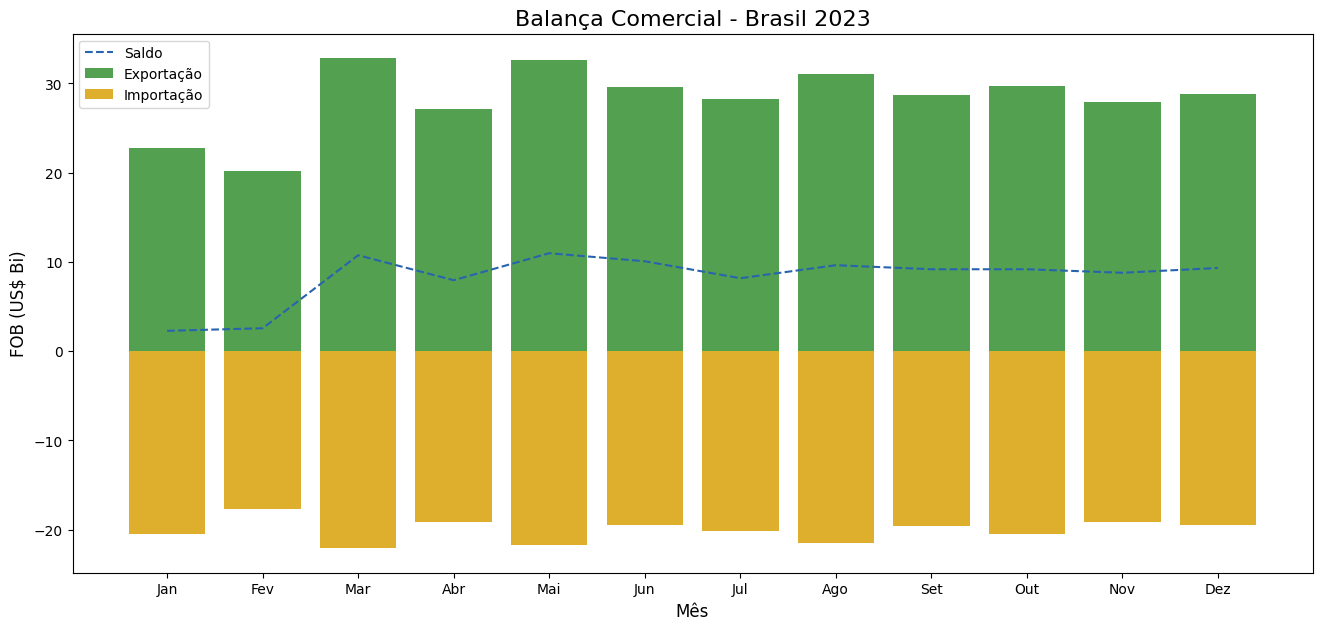

In [ ]:
ax = sns.barplot(dados_mes,x = dados_mes.index.values, y = dados_mes['Exportação'], color = '#46AD44', label ='Exportação')
ax = sns.barplot(dados_mes,x = dados_mes.index.values, y = dados_mes['Importação'], color = '#FABD10', label = 'Importação')
ax = sns.lineplot(dados_mes,x = dados_mes.index.values, y = dados_mes['Exportação'] + dados_mes['Importação'], label = 'Saldo',linestyle = 'dashed', color ='#2864AE')
ax.figure.set_size_inches(16, 7)
ax.set_title('Balança Comercial - Brasil 2023', fontsize = 16)
ax.set_ylabel('FOB (US$ Bi)', fontsize = 12)
ax.set_xlabel('Mês', fontsize = 12)

ax

## 5.2 Saldo comercial

<Axes: title={'center': 'Saldo da Balança Comercial - Brasil 2023'}, xlabel='Mês', ylabel='FOB (US$ Bi)'>

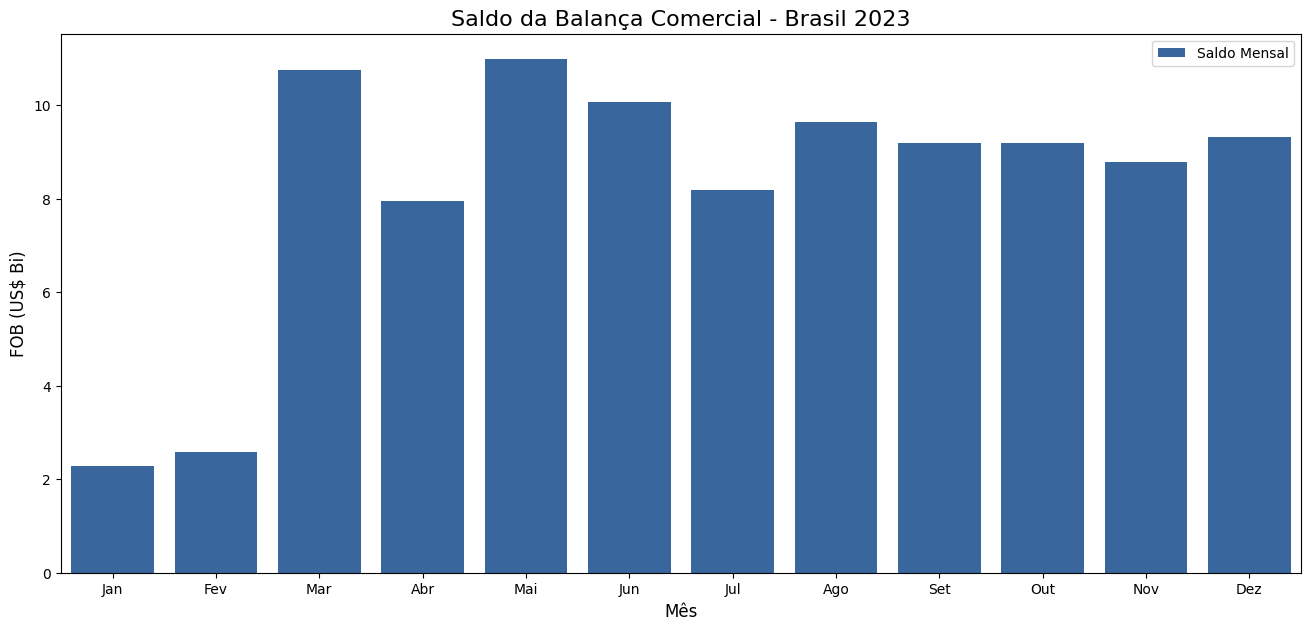

In [ ]:
## Gráfico do saldo mensal
ax = sns.barplot(dados_mes,x = dados_mes.index.values, y = dados_mes['Exportação'] + dados_mes['Importação'], color = '#2864AE', label = "Saldo Mensal")
ax.figure.set_size_inches(16, 7)
ax.set_title('Saldo da Balança Comercial - Brasil 2023', fontsize = 16)
ax.set_ylabel('FOB (US$ Bi)', fontsize = 12)
ax.set_xlabel('Mês', fontsize = 12)
ax

In [ ]:
## Cálculo da média do saldo mensal

dados_mes['Saldo'] = dados_mes['Exportação'] + dados_mes['Importação']
media_saldo = dados_mes['Saldo'].mean()
media_saldo.round(2)

8.24

In [ ]:
## Cálculo do saldo acumulado

saldo_acumulado = dados_mes['Saldo'].sum().round(2)
saldo_acumulado

98.9

<Axes: title={'center': 'Saldo da Balança Comercial - Brasil 2023'}, xlabel='Mês', ylabel='FOB (US$ Bi)'>

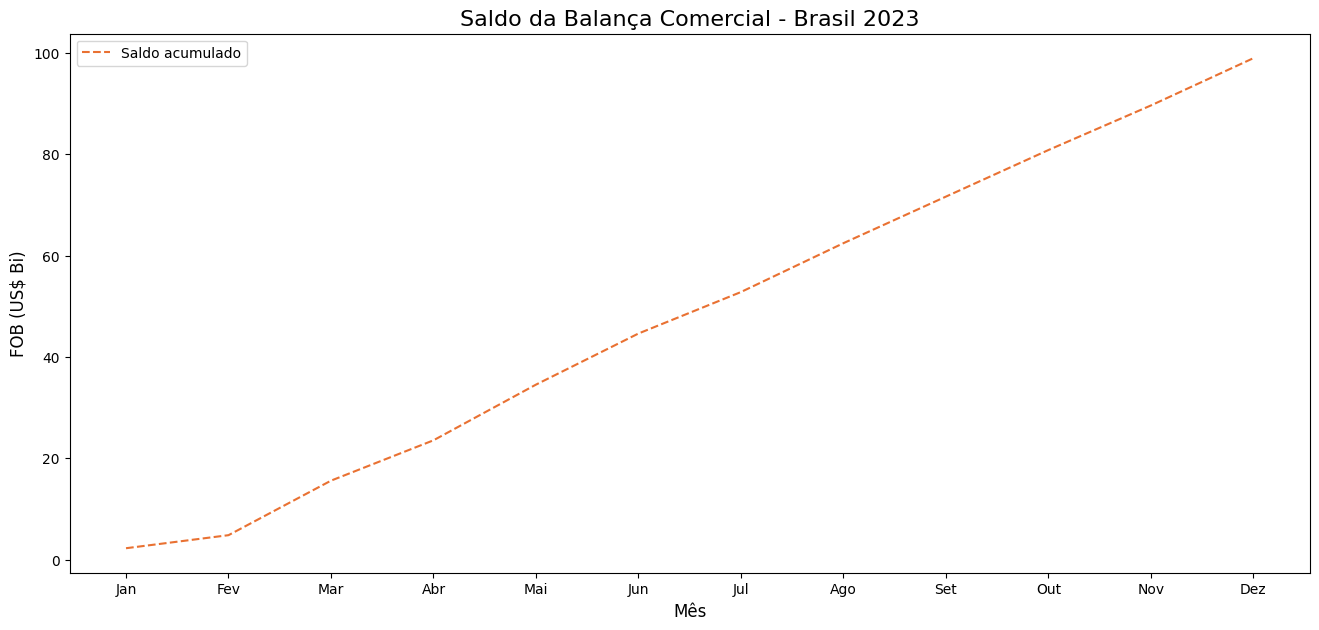

In [ ]:
## Cálculo do valor acumulado
dados_mes['Acumulado'] = dados_mes['Exportação'].cumsum() + dados_mes['Importação'].cumsum()

ax = sns.lineplot(dados_mes,x = dados_mes.index.values, y = dados_mes['Acumulado'], label = 'Saldo acumulado',linestyle = 'dashed', color ='#E97132')
ax.figure.set_size_inches(16, 7)
ax.set_title('Saldo da Balança Comercial - Brasil 2023', fontsize = 16)
ax.set_ylabel('FOB (US$ Bi)', fontsize = 12)
ax.set_xlabel('Mês', fontsize = 12)
ax

O inicío do ano teve valores próximos de exportações e importações, trazendo o saldo da balança para um valor próximo a US\$ 2 Bi.

Com o aumento de exportações a partir de março e um número estável das importações o saldo também cresceu, tendo um valor médio na casa dos US\$ 8,24 Bi.


## 5.3 Conclusão

No valor acumulado do ano, o país apresentou superávit de 98,9 bilhões de dólares, que consolida o Brasil como um grande exportador e ratifica a importância do comércio exterior para a saúde econômica do país.